# Bank Project - 7 

In [ ]:
## Import 
#### Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score,classification_report

In [2]:
bank_data = pd.read_excel("E:/Bank_full.xlsx")

In [3]:
df1=bank_data.copy()

In [4]:
df2=bank_data.copy()

In [7]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df1.shape

(45211, 17)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df1.duplicated().sum()

0

In [11]:
df1.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [12]:
depo = sum(df1["y"]=="yes")
print('Numbers of existing terms depositors', depo)

Numbers of existing terms depositors 5289


In [13]:
# Number of housing holder has terms deposit 
house_depo=len(df1[(df1['y']=='yes') & (df1['housing']=='yes')])
print('Number of housing holder has terms deposit',house_depo)

Number of housing holder has terms deposit 1935


In [14]:
# Number of loanholder has terms deposit 
loan_depo=len(df1[(df1['y']=='yes') & (df1['loan']=='yes')])
print('Number of loan holder has terms deposit',loan_depo)

Number of loan holder has terms deposit 484


In [15]:
# Number of defaulter 
defaulter = sum(df1['default']=='yes')
print('Number of defaulter', defaulter)

Number of defaulter 815


In [16]:
defaulter_with_depo = len(df1[(df1['default']=='yes') & (df1['y']=='yes')])
print('Number of defaulter with deposit', defaulter_with_depo)

Number of defaulter with deposit 52


In [17]:
month_depo=df2[df2['y']=='yes']
month_depo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


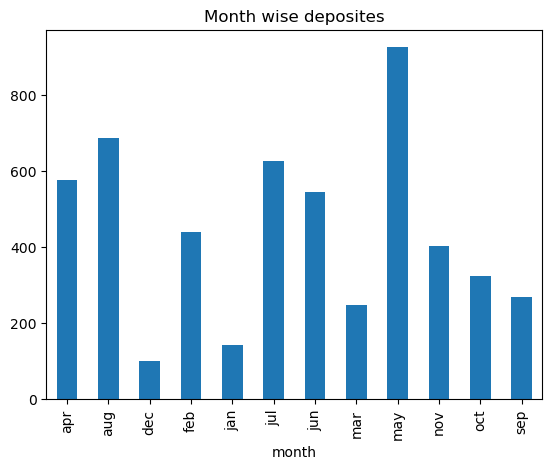

In [18]:
# Monthwise deposit 
month_depo.groupby('month').count()['y'].plot(kind='bar')
plt.title('Month wise deposites')
plt.show()

In [19]:
job_balance=df2[df2['y']=='yes'][['job','balance', 'y']]
job_balance.head(2)

,job,balance,y
83,admin.,2343,yes
86,admin.,45,yes


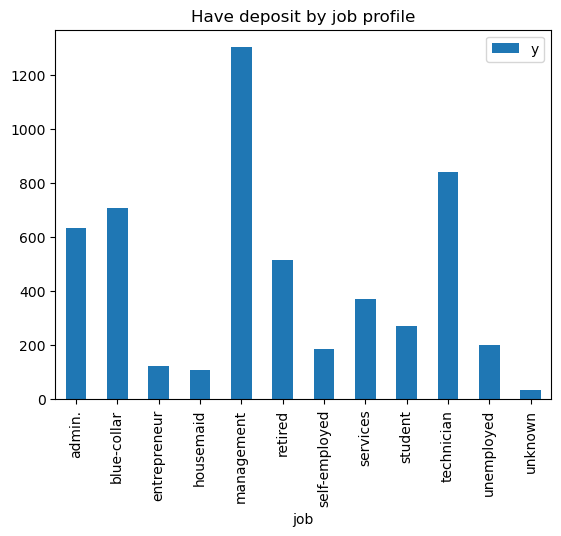

In [20]:
job_balance.groupby('job').count()[['y']].plot(kind='bar')
plt.title('Have deposit by job profile')
plt.show()

In [21]:
df2.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [22]:
no_depo = df2[df2['y']=='no'][['job','balance', 'y']]

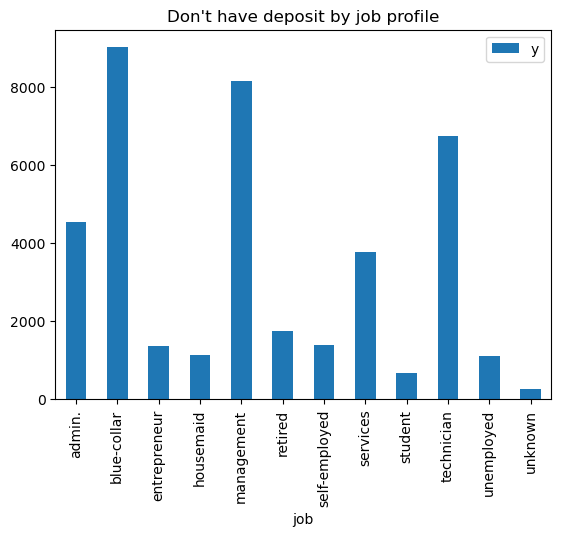

In [23]:
no_depo.groupby('job').count()[['y']].plot(kind='bar')
plt.title("Don't have deposit by job profile")
plt.show()

In [24]:
df2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


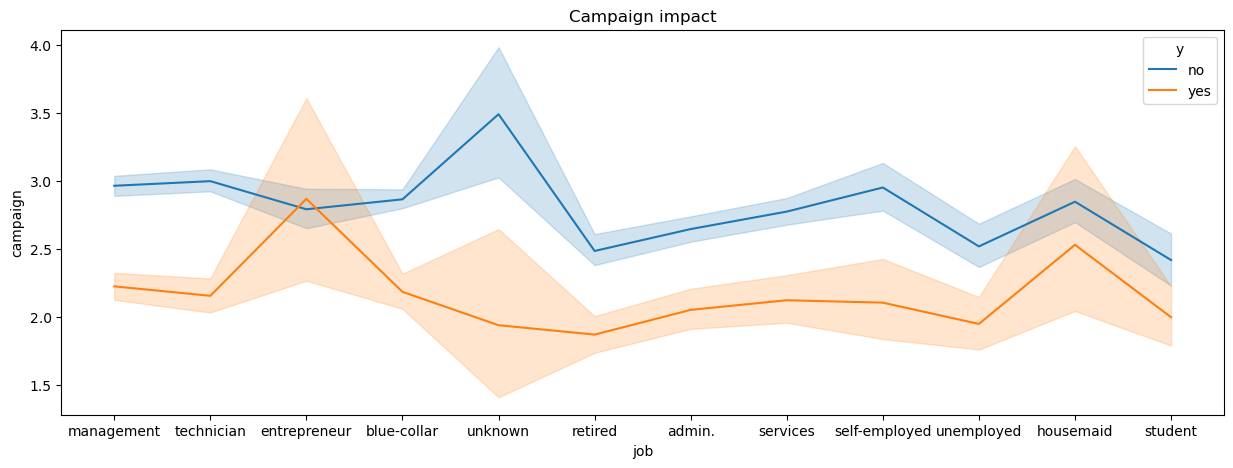

In [26]:
plt.figure(figsize=(15,5))
sns.lineplot(x='job',y='campaign', hue='y', data =df2 )
plt.title("Campaign impact")
plt.show()

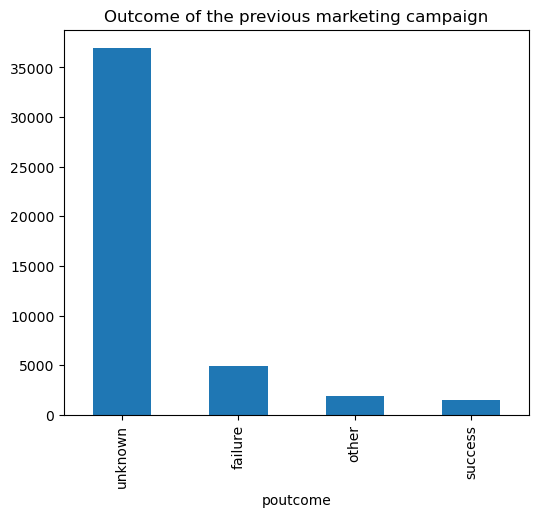

In [32]:
plt.figure(figsize=(6,5))
df1['poutcome'].value_counts().plot(kind='bar')
plt.title("Outcome of the previous marketing campaign")
plt.show()

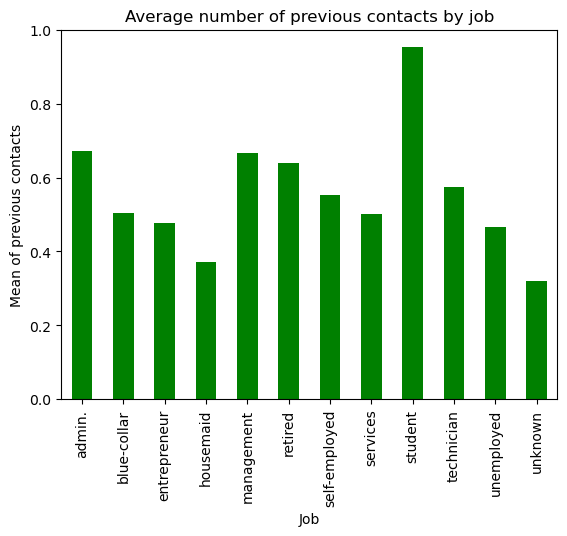

In [25]:
means = df1.groupby('job')['previous'].mean()
# Plot the means as a bar chart
means.plot(kind='bar', color='green')
plt.xlabel("Job")
plt.ylabel("Mean of previous contacts")
plt.title("Average number of previous contacts by job")
plt.show()


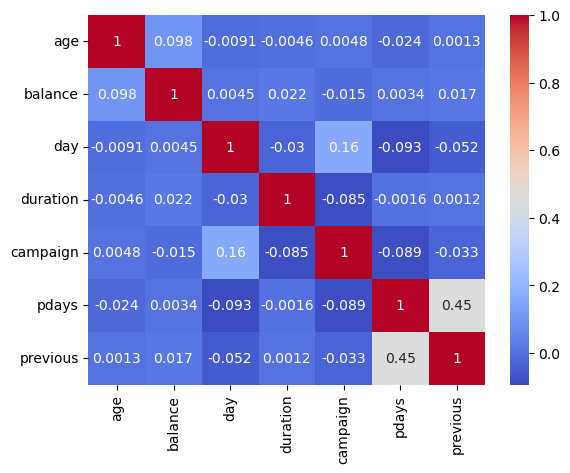

In [34]:
corr = df2.select_dtypes(include=['number']).corr()

sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


 * prediction of model

In [37]:
df2.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [38]:
## Encodeing 
dummy = pd.get_dummies(df2[['job','marital','education','contact','month', 'poutcome',]])
dummy.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [39]:
# Replace 'yes' by 1 and 'no' by 0
df2['default'] = df2['default'].replace(to_replace={'yes':1, 'no':0})
df2['housing'] = df2['housing'].replace(to_replace={'yes':1, 'no':0})
df2['loan'] = df2['loan'].replace(to_replace={'yes':1, 'no':0})
df2['y'] = df2['y'].replace(to_replace={'yes':1, 'no':0})

In [40]:
df3 = pd.concat([df2,dummy], axis=1)

* Spliting X andd y

In [42]:
X = df3[['age','default', 'housing', 'loan','job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']]
X.head(2)

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,1,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
1,44,0,1,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [43]:
y=df3['y']

In [44]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=365)

In [45]:
lg_model = LogisticRegression()
lg_model_fit = lg_model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\py\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
pred = lg_model_fit.predict(X_test)

In [47]:
acc = accuracy_score(y_test,pred)
prc = precision_score(y_test,pred)
clf = classification_report(y_test,pred)
conf = confusion_matrix(y_test,pred)

In [48]:
print('Accuracy of model', acc)

Accuracy of model 0.8935087913303107


In [49]:
print('Accuracy of precision_score', prc)

Accuracy of precision_score 0.6678445229681979


In [50]:
clf

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94      7985\n           1       0.67      0.18      0.28      1058\n\n    accuracy                           0.89      9043\n   macro avg       0.78      0.58      0.61      9043\nweighted avg       0.87      0.89      0.87      9043\n'

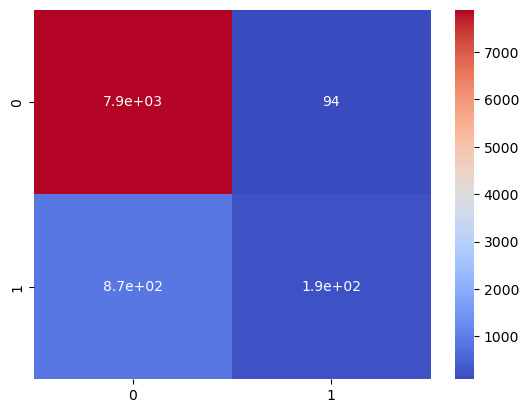

In [51]:
sns.heatmap(conf, annot=True, cmap = 'coolwarm')
plt.show()